## Decision Trees [Drug prescription]

### Importing

In [1]:
import numpy as np
import pandas as pd

### Download dataset

In [2]:
!wget -O drug200.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


### Load dataset

In [3]:
df = pd.read_csv('drug200.csv', delimiter=',')
df[:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


### Pre-processing

In [4]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

Features

In [5]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

Converting categorical values to numerical values

In [6]:
from sklearn import preprocessing

le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]


array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

Labels

In [7]:
Y = df['Drug']
Y[:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

### Setting up the decision tree

Train test split

In [8]:
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3, random_state=3)

Modeling

In [9]:
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Fitting

In [10]:
dTree.fit(trainX, trainY)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Prediction

In [11]:
predTree = dTree.predict(testX)
print (predTree [0:5])
print (testY [0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


### Evaluation

In [12]:
from sklearn import metrics

print(f"DecisionTrees's Accuracy: {metrics.accuracy_score(testY, predTree)}")

DecisionTrees's Accuracy: 0.9833333333333333


### Visualization

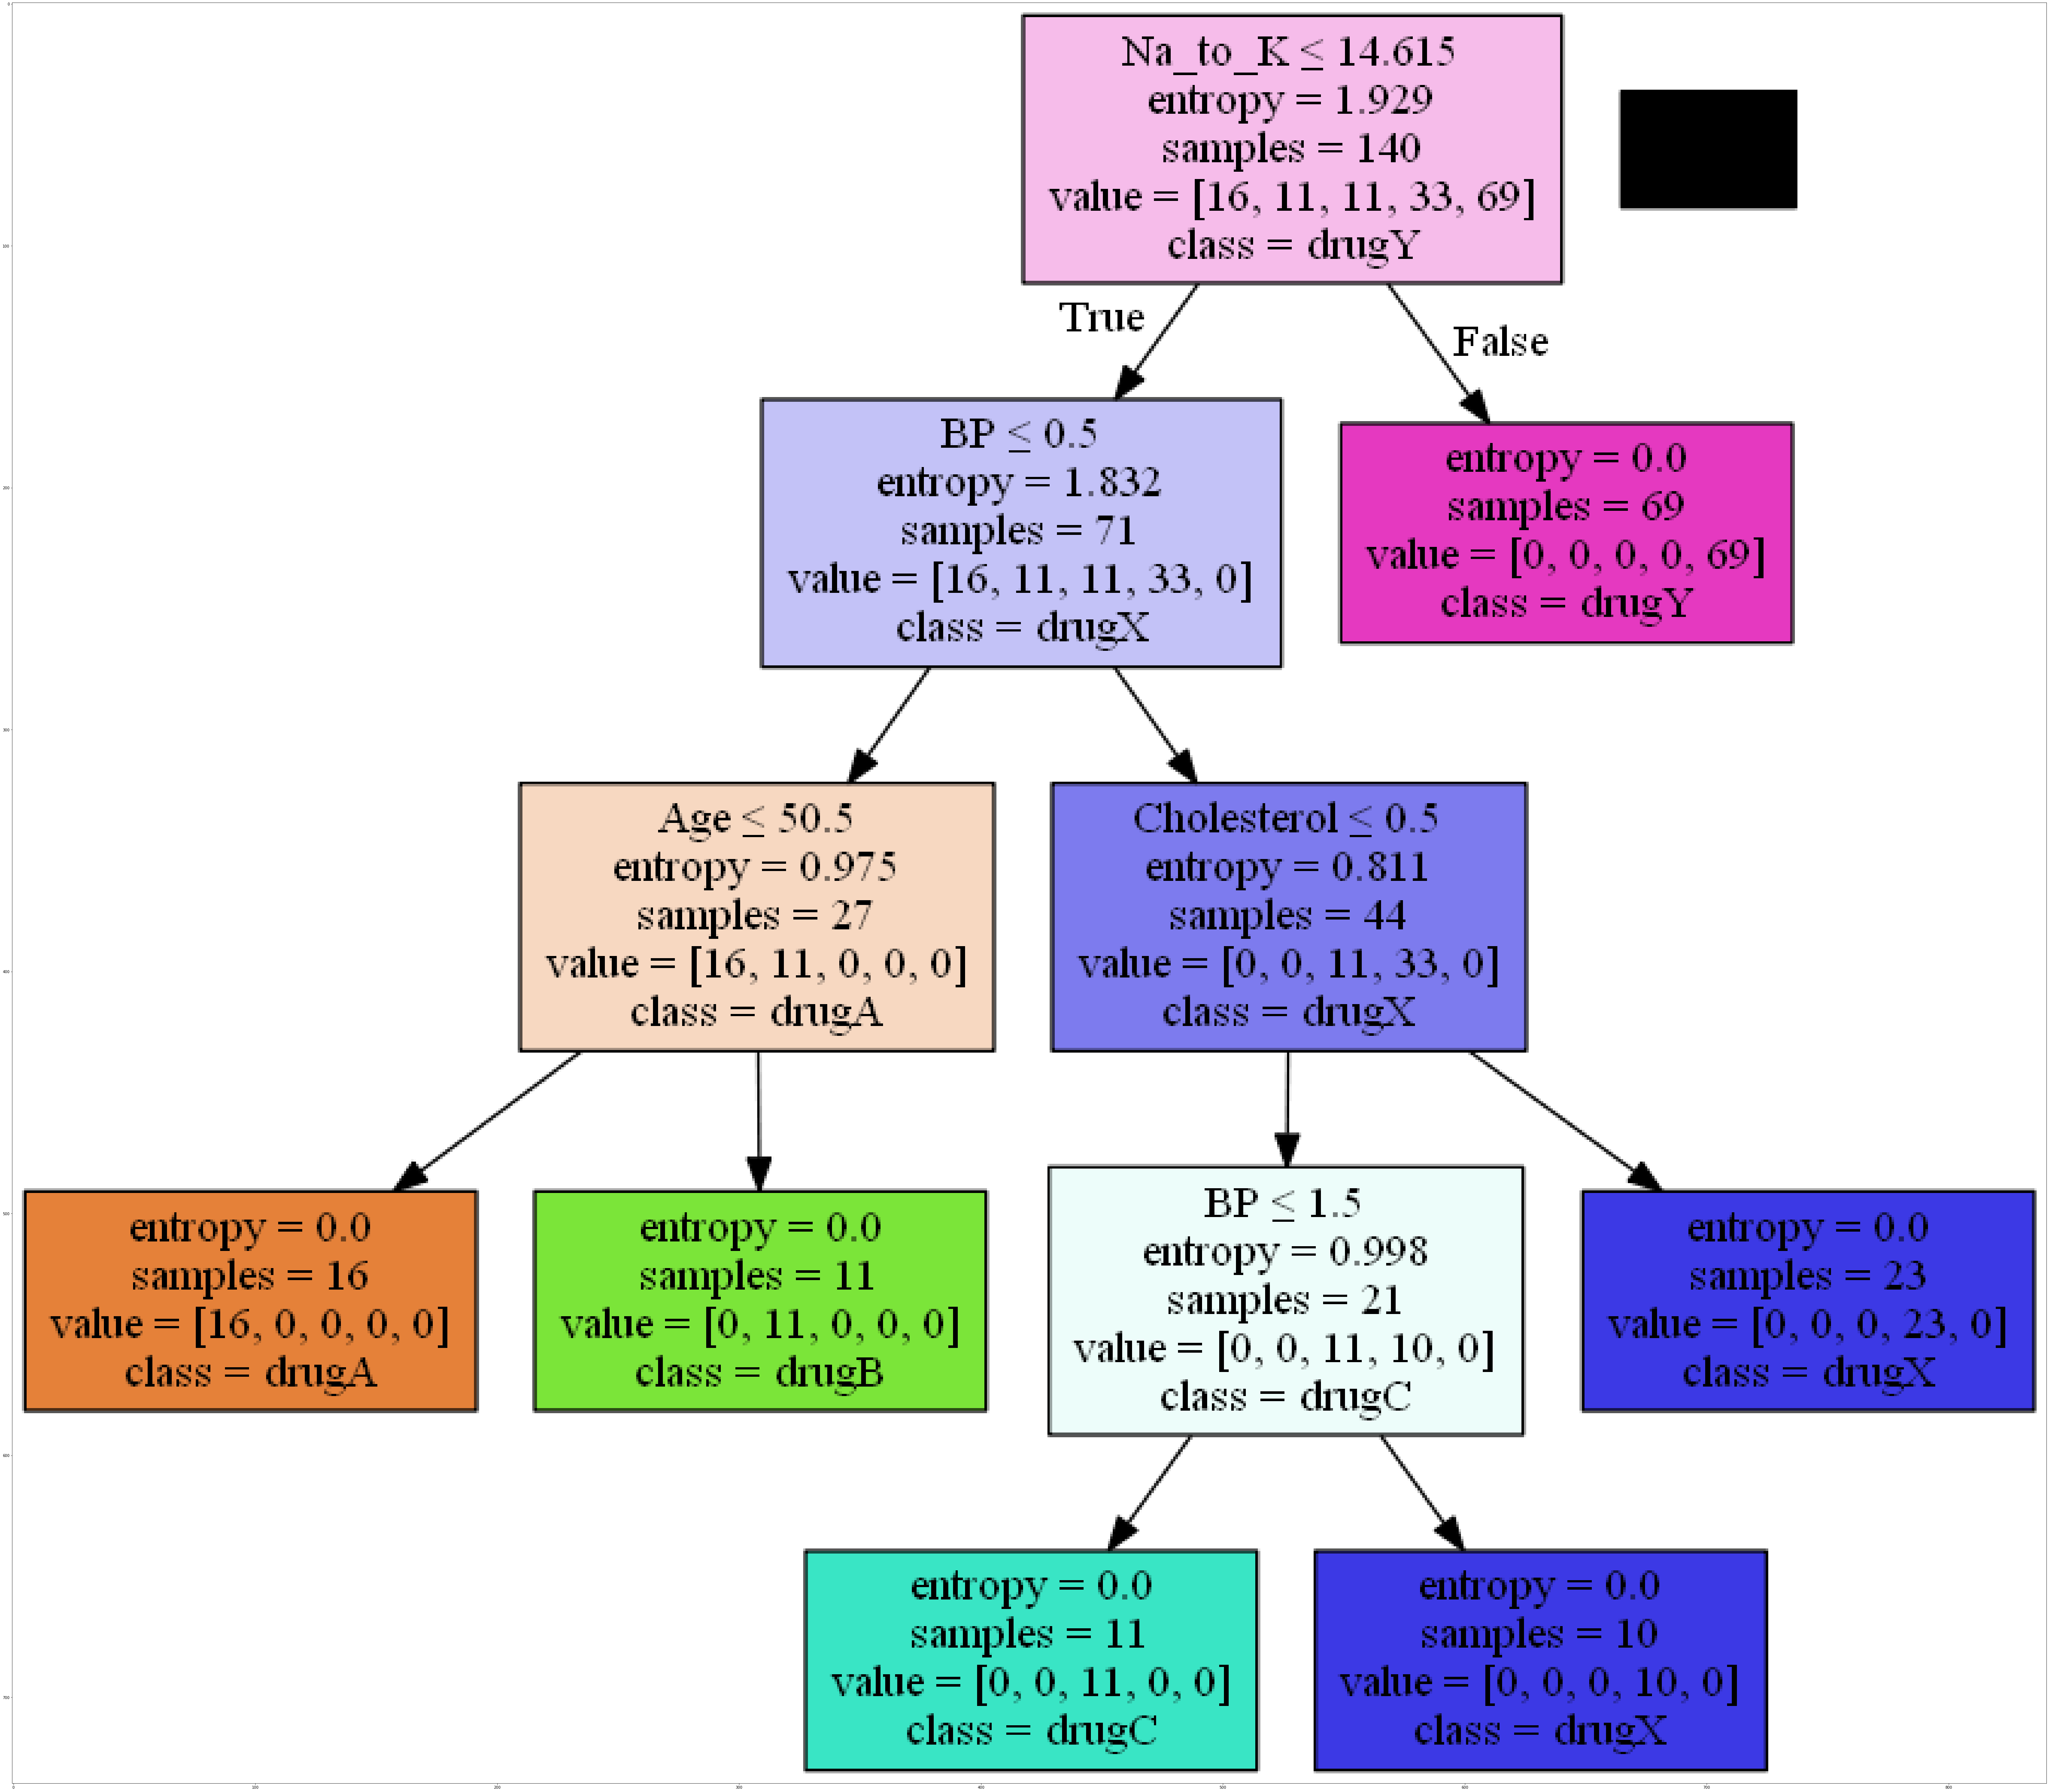

In [13]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline

dot_data = StringIO()
filename = "dTree.png"
featureNames = df.columns[0:5]
out=tree.export_graphviz(dTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(trainY), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')


### Training with the testing data

In [14]:
dTree.fit(testX, testY)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### Pickling

In [15]:
from pickle import dump

with open('dTreedrug200.pkl', 'wb') as f:
    dump(dTree, f)